<a href="https://colab.research.google.com/github/god-konw/Source-Code/blob/master/1_DataProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/'

In [ ]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
train = pd.read_csv(path+'datasets/train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
train.shape

(175341, 45)

In [ ]:
train['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

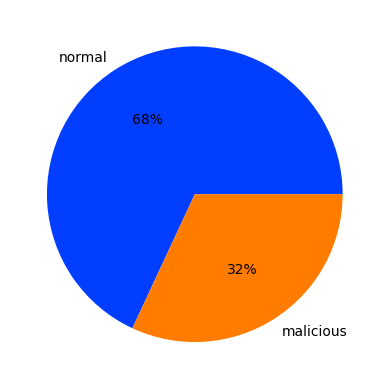

In [ ]:
#define data
data = train['label'].value_counts()
labels = ['normal', 'malicious']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
train['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [ ]:
train['is_ftp_login'].value_counts()

0    172774
1      2545
4        16
2         6
Name: is_ftp_login, dtype: int64

In [ ]:
train['service'] = train['service'].apply(lambda x:'None' if x== '-' else x)
train['is_ftp_login'] = np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])

In [ ]:
def multi_corr(col1, col2="label", df=train):
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])
    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="label", df=train):
    return df[[col1, col2]].corr().iloc[0,1]

<ipython-input-47-5c4acf2bb3a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = train.corr(method=method)


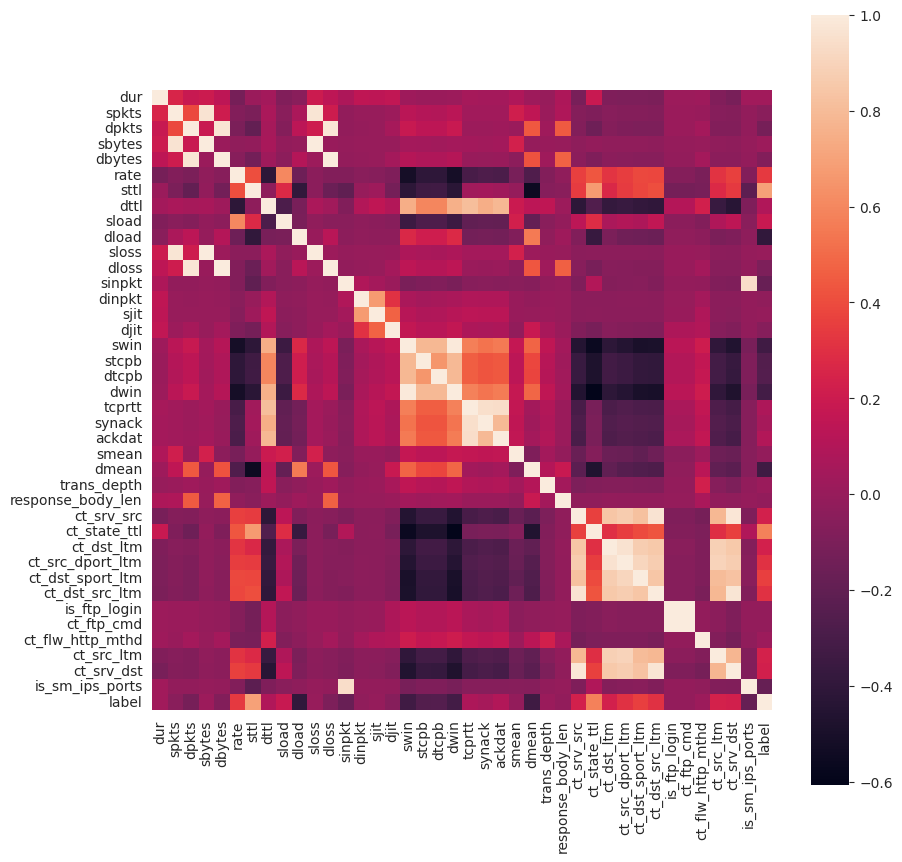

In [ ]:
method = "pearson"
corr_mat = train.corr(method=method)

plt.figure(figsize=(10,10)) 
sns.heatmap(corr_mat, square=True)
plt.savefig(path+f"/pic/pearson_corr.png")
plt.show()

In [ ]:
limit = 0.9
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

spkts                sbytes               0.9637905453658627
spkts                sloss                0.9710686917738107
dpkts                dbytes               0.9719070079919281
dpkts                dloss                0.9786363765709863
sbytes               sloss                0.9961094729148002
dbytes               dloss                0.9965035947623478
sinpkt               is_sm_ips_ports      0.9413189007355157
swin                 dwin                 0.9901399299415929
tcprtt               synack               0.9494676611067603
tcprtt               ackdat               0.9417603738127356
ct_srv_src           ct_dst_src_ltm       0.9671378245460094
ct_srv_src           ct_srv_dst           0.9803230099911133
ct_dst_ltm           ct_src_dport_ltm     0.9620518416459877
ct_src_dport_ltm     ct_dst_sport_ltm     0.9067931558835277
ct_dst_src_ltm       ct_srv_dst           0.9723704538697349
is_ftp_login         ct_ftp_cmd           0.9729150411024579


In [ ]:
normal = train[train['label']==0]
malicious = train[train['label']==1]

In [ ]:
def col_countplot(col, train_data=train):
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
# Plotting pdf of numerical columns
def dual_plot(col, data1=normal, data2=malicious, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()
def reduce_column(s, to_keep):
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

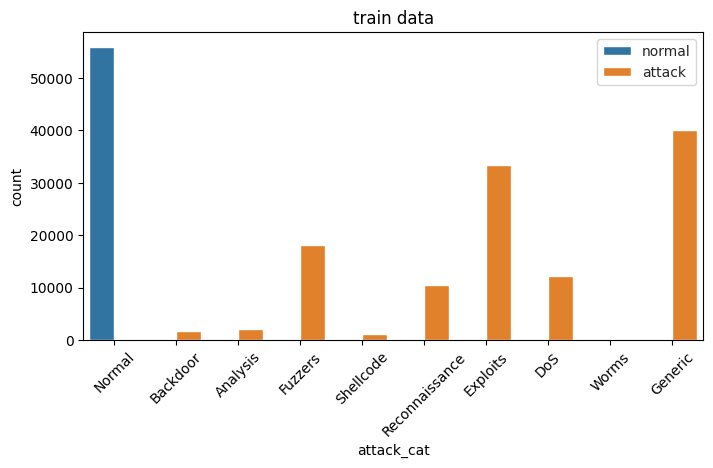

In [ ]:
col_countplot('attack_cat')

KeyboardInterrupt: ignored

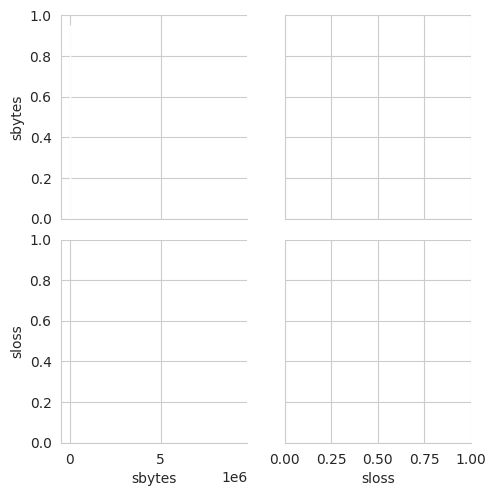

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

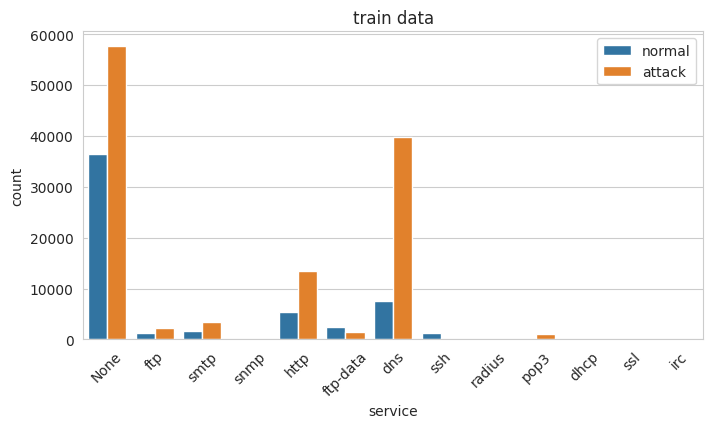

In [ ]:
col_countplot('service')

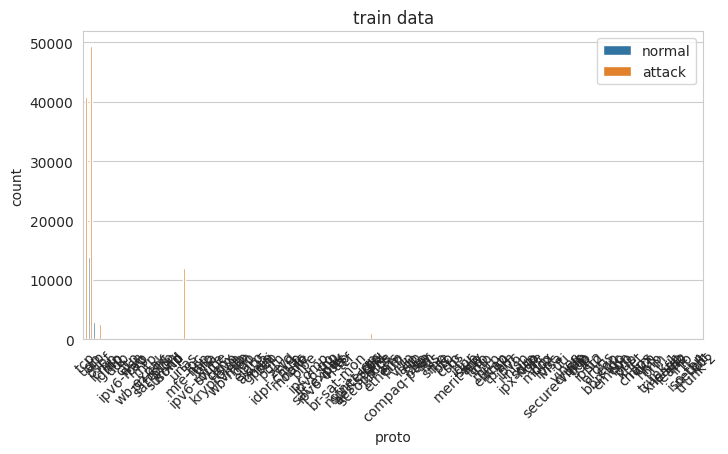

In [ ]:
col_countplot('proto')

In [ ]:
train.drop('id',axis=1,inplace=True)
train.drop('attack_cat',axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:

corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))# Select upper triangle of correlation matrix

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

<ipython-input-48-b60b7cd7d1a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().abs()
<ipython-input-48-b60b7cd7d1a1>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))# Select upper triangle of correlation matrix


In [ ]:
print(to_drop)

['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'synack', 'ackdat', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
train.shape

(175341, 43)

In [ ]:
todrop = ['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'synack', 'ackdat', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst', 'is_sm_ips_ports']

In [ ]:
train.drop(columns=todrop, inplace=True)

In [ ]:
train.shape

(175341, 30)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sinpkt             175341 non-null  float64
 12  dinpkt             175341 non-null  float64
 13  sjit               175341 non-null  float64
 14  djit               175341 non-null  float64
 15  swin               175341 non-null  int64  
 16  st

In [ ]:
col_countplot('rate')

KeyboardInterrupt: ignored

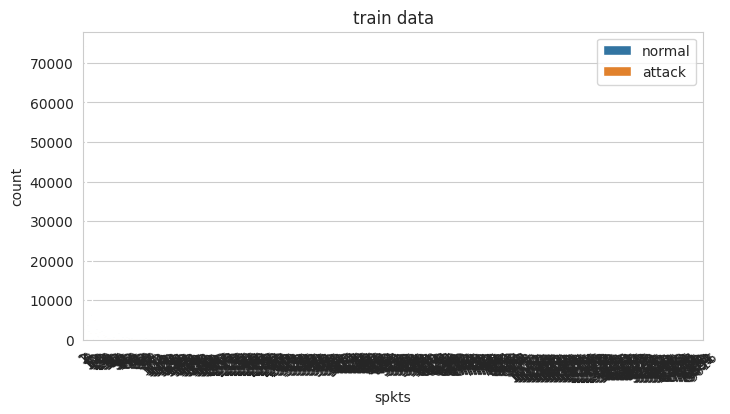

In [ ]:
col_countplot('spkts')

In [ ]:
upper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, dur to label
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                0 non-null      float64
 1   spkts              1 non-null      float64
 2   dpkts              2 non-null      float64
 3   sbytes             3 non-null      float64
 4   dbytes             4 non-null      float64
 5   rate               5 non-null      float64
 6   sttl               6 non-null      float64
 7   dttl               7 non-null      float64
 8   sload              8 non-null      float64
 9   dload              9 non-null      float64
 10  sloss              10 non-null     float64
 11  dloss              11 non-null     float64
 12  sinpkt             12 non-null     float64
 13  dinpkt             13 non-null     float64
 14  sjit               14 non-null     float64
 15  djit               15 non-null     float64
 16  swin               16 non-nu

In [ ]:
x_train, y_train = train.drop(columns=['label']), train['label']

In [ ]:
train.dtypes.value_counts()

int64      18
float64     9
object      3
dtype: int64

In [ ]:
train.select_dtypes(exclude=np.number).columns

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
cat_col = ['proto', 'service', 'state']
num_col = list(set(x_train.columns) - set(cat_col))

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])

In [ ]:
x_train[num_col] = scaler.transform(x_train[num_col])

In [ ]:
x_train.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm
0,-0.191029,tcp,-,FIN,-0.104456,-0.135769,-0.576371,0.703839,1.578100,-0.389897,...,-0.458048,-0.314240,-0.136415,-0.039557,-0.775991,-1.366486,-0.645013,-0.118590,-0.189768,-0.715714
1,-0.109485,tcp,-,FIN,-0.046014,0.172599,-0.576345,-1.141901,1.560002,-0.389928,...,-0.414076,3.800869,-0.136415,-0.039557,3.147666,-0.318711,-0.645013,-0.118590,-0.189768,-0.715714
2,0.040699,tcp,-,FIN,-0.089845,-0.026933,-0.576734,-1.141901,1.560002,-0.389964,...,-0.443391,2.709185,-0.136415,-0.039557,-0.215468,-0.318711,-0.520827,-0.118590,-0.189768,-0.595543
3,0.049729,tcp,ftp,FIN,-0.060624,-0.063212,-0.576737,-1.141901,1.560002,-0.389958,...,-0.414076,-0.232945,-0.136415,-0.039557,-0.775991,-0.318711,-0.520827,7.814915,-0.189768,-0.595543
4,-0.140417,tcp,-,FIN,-0.075235,-0.117630,-0.576617,0.723268,1.560002,-0.389927,...,-0.409190,-0.306498,-0.136415,-0.039557,3.147666,-0.318711,-0.520827,-0.118590,-0.189768,-0.595543


In [ ]:
service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
ohe_service = service_.fit(x_train.service.values.reshape(-1,1))
ohe_proto = proto_.fit(x_train.proto.values.reshape(-1,1))
ohe_state = state_.fit(x_train.state.values.reshape(-1,1))

In [ ]:
for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(x_train[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    x_train = pd.concat([x_train.drop(col, axis=1), tmp_df], axis=1)

In [ ]:
x_train.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,-0.191029,-0.104456,-0.135769,-0.576371,0.703839,1.578100,-0.389897,-0.273700,-0.132788,-0.080885,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.109485,-0.046014,0.172599,-0.576345,-1.141901,1.560002,-0.389928,-0.069233,-0.129251,-0.073735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.040699,-0.089845,-0.026933,-0.576734,-1.141901,1.560002,-0.389964,-0.252044,-0.104126,0.014711,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049729,-0.060624,-0.063212,-0.576737,-1.141901,1.560002,-0.389958,-0.275821,-0.115034,0.002046,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.140417,-0.075235,-0.117630,-0.576617,0.723268,1.560002,-0.389927,-0.275561,-0.129549,-0.012721,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.shape, x_train.shape

((175341,), (175341, 181))

In [ ]:
x_train.to_csv(path+'datasets/p_train.csv', index=False)
y_train.to_csv(path+'datasets/p_test.csv', index=False)

In [ ]:
df = x_train.join(y_train)

In [ ]:
df.shape

(175341, 182)